<table align="center" width="100%">
    <tr>
        <td width="20%">
            <img src="https://ctil.dundee.ac.uk/wp-content/uploads/2022/01/icon_points-1024x1024.png">
        </td>
        <td>
            <div align="center">
                <font color="#7F0542" size="6">
                    <b>Correlation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## <font color='red'>**Please note that any topics that are not covered in today's lecture will be covered in the next lecture.**</font>

## <font color='blue'>**Content**</font>

- Correlation
  - Pearson Correlation
  - Spearman Correlation
     - Height vs Weight Example
     - Icecream sales vs Amount of Rain Example
     - Salary vs Experience Example
  - Visualizing Correlation using HeatMap

## <font color='blue'>**Correlation**</font>

<font color='purple'>Let's recall our conceptual learnings in the hypothesis testing.</font>


- <font color='purple'>Numerical Vs Categorical (2 Categories):</font>
  - We use 2 samples T-test or Z-test.
  - It helps us see if there's a difference in the numerical values between these two categories.
- <font color='purple'>Numerical Vs Categorical (>2 Categories):</font>
 - We use the ANOVA test.
 - This test helps us figure out if there's a significant difference among the numerical values when we have more than two categories to compare.
- <font color='purple'>Categorical Vs Categorical:</font>
 - We use the Chi-square test.
 - It's like a detective tool that helps us find out if there's a relationship or connection between these categories.
- <font color='purple'>Numerical Vs Numerical:</font>
 - If these two variables are related, we use a correlation test.
 - It helps us figure out if changes in one variable are connected to changes in the other variable.



### <font color='purple'>**Example 1: Height vs Weight**</font>

Picture this: You've often noticed how certain attributes seem to be interconnected.

- For instance, when given a height value, you can make an educated guess about the associated weight.
- There's a sense of connection between these variables that we can quantify using correlation.

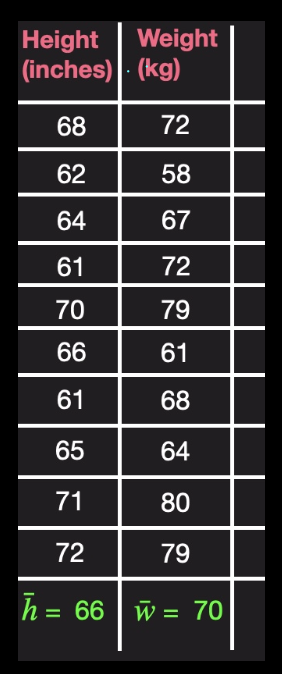

The mean height is around 66 inches, and the mean weight is approximately 70 pounds.

<br>

Imagine we have a dataset that reflects such a connection, like the correlation between height and weight.

When we plot this data, a scatter plot emerges, where each point represents a unique combination of height and weight: Consider the point `(68, 72).`

- To better understand the relationship, we draw a small rectangle from this point, aligning one corner with the x-axis.
- The other corner, the actual data point, aligns with the center point between the mean height and mean weight.
- Calculating the area of this rectangle,
    - For the first point `(68-66) * (72-70) = 2 * 2 = 4`.
    - The second point `(62 - 66) * (58 - 70)= -4 * -12  = 48`
    - The third point: `(64-66) * (67-70) = -2 * -3 = 6`
    - The fourth point `(61-66) * (72-70) = -5 * 2 = -10`

<br>

> <font color='purple'>Why does the **fourth point** yield a **negative** value, while the others are positive?</font>

The answer lies in the positioning relative to the mean.

The fourth point has less height but more weight than the mean, leading to negative x and positive y values.

This positions it in the second quadrant.

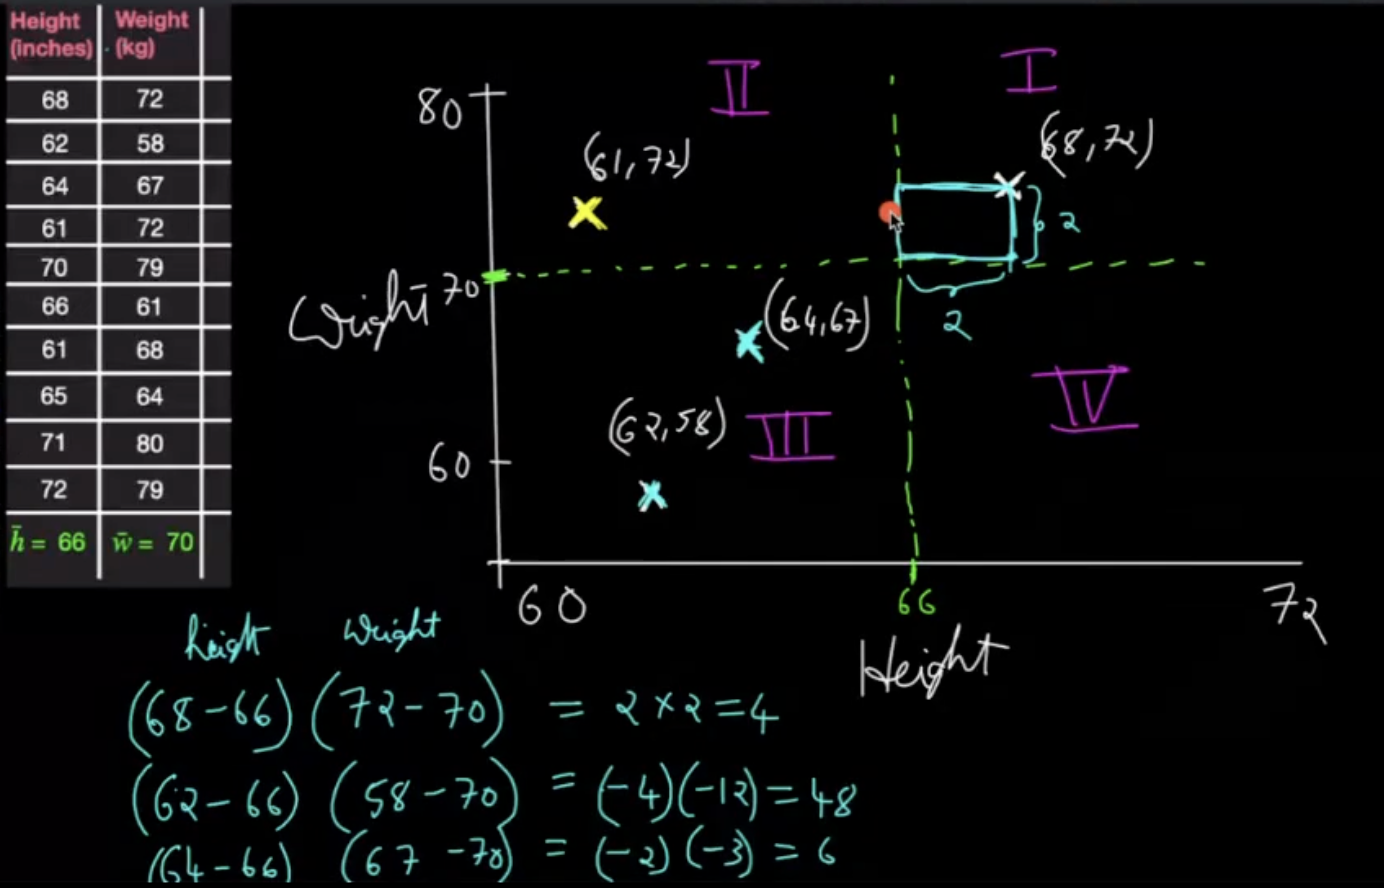

This brings us to the categorisation of quadrants.
- Points in the **first** and **third** quadrants (like 1 and 3) exhibit **positive relationships**, whereas
- Points in the **second** and **fourth** quadrants (like 2 and 4) demonstrate **negative relationships**.

> <font color='purple'>But what about the quantification?</font>

<font color='purple'>Importing Libraries</font>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1M6ICGsUhO-IIFl_HPYpk9vJO-GJEszmC -O weight-height.csv

--2024-01-18 09:49:01--  https://drive.google.com/uc?id=1M6ICGsUhO-IIFl_HPYpk9vJO-GJEszmC
Resolving drive.google.com (drive.google.com)... 172.253.123.139, 172.253.123.138, 172.253.123.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.123.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1M6ICGsUhO-IIFl_HPYpk9vJO-GJEszmC [following]
--2024-01-18 09:49:01--  https://drive.usercontent.google.com/download?id=1M6ICGsUhO-IIFl_HPYpk9vJO-GJEszmC
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.212.132, 2607:f8b0:400c:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.212.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.005s  

2024-01-18 09:49:02 (84

In [ ]:
df_hw = pd.read_csv("/content/weight-height.csv")

In [ ]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Weight'>

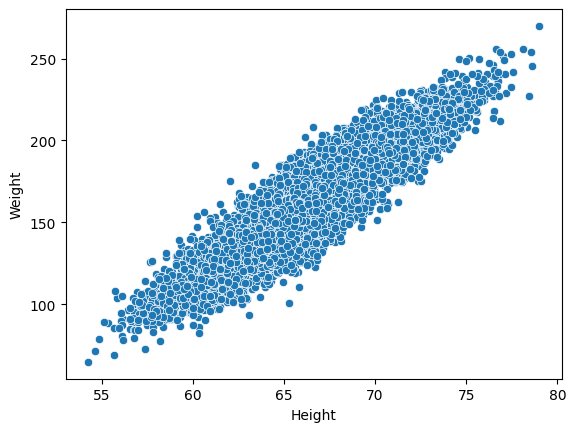

In [ ]:
sns.scatterplot(x=df_hw["Height"], y=df_hw["Weight"])

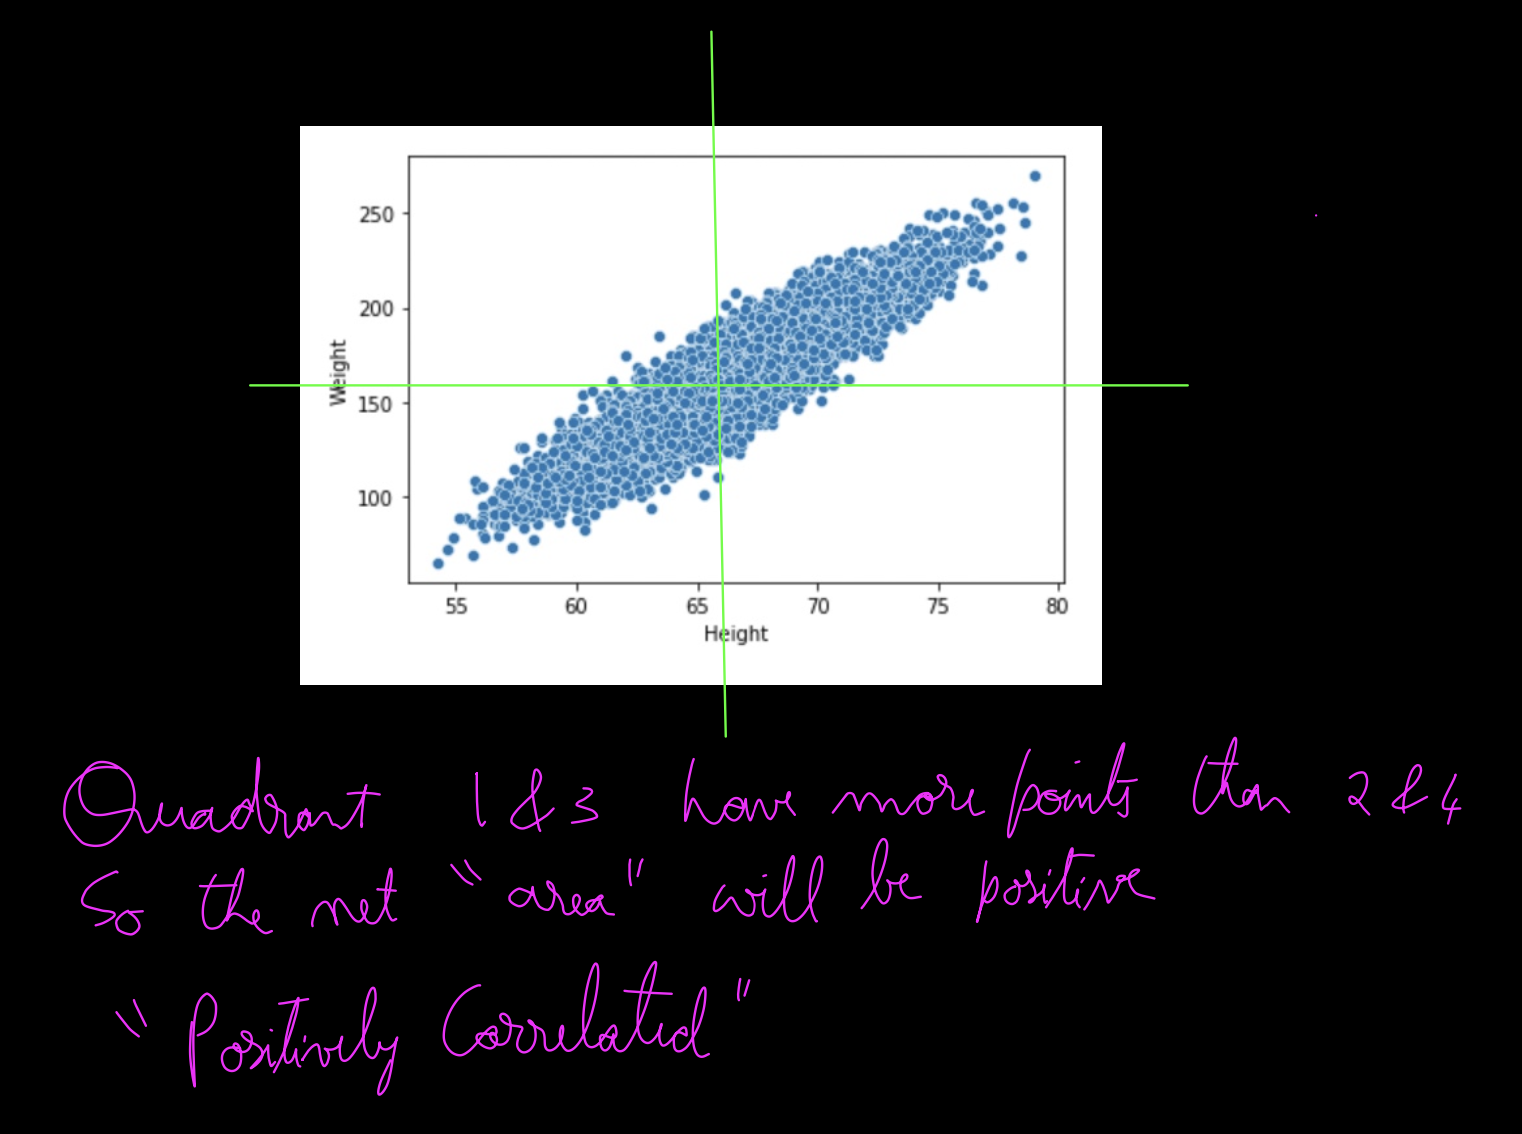

- Observing the scatter plot, we notice that quadrants 1 and 3 have more points than quadrants 2 and 4. This suggests that the net area of the scatter plot is positive.
- Given the positive net area, we use the term <font color='purple'>**" positively correlated."**</font>

Here's the formula we use to calculate this: $\frac{1}{n} Σ_{i=1}^n (h_i - \bar{h}) . (w_i - \bar{w})$

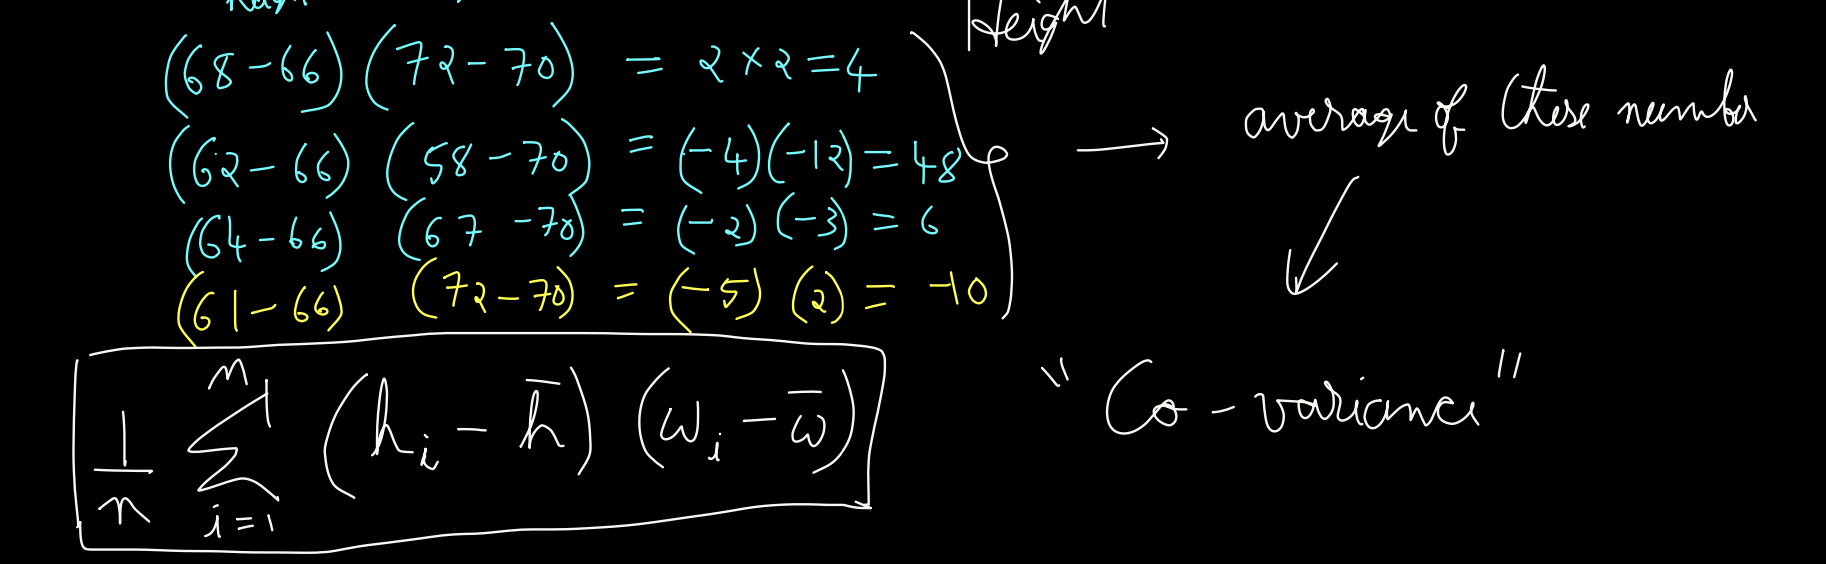

Covariance measures the direction and the strength of the linear relationship between two variables.

**General Formula:** $Cov(X, Y) = E[(X - E(X))(Y - E(Y))]$

Where:
- E represents the expected value (average).
- X and Y are the two variables (i.e., Height & Weight)
- E(X) and E(Y) represent the average values of X and Y, respectively.(E(X) represents $\bar{h}$ & E(Y) represents $\bar{w}$)

### <font color='purple'>**Example 2: Ice-cream sales vs Amount of Rain**</font>

Imagine we have a dataset that relates ice cream sales to the amount of rainfall.
  - We represent this data visually on a scatter plot, where each point corresponds to a specific combination of ice cream sales and rainfall.

- To provide a clearer picture, we draw two <font color="green">green lines</font> that indicate the **average number** for each variable.

As we analyze this plot, we notice that it divides into four quadrants, each with its distinct characteristics.

This division into quadrants stems from the intersections of the mean values of ice cream sales and rainfall.

<br>

<font color='purple'>Q. What does this plot reveal about the correlation between ice cream sales and rainfall?</font>

We note that the scatter plot points seem to cluster more in the **second** and **fourth** quadrants, as compared to the first and third quadrants.

<font color='purple'>Q. What's the significance of this pattern?</font>

  - Based on the distribution of points, the net area turns out to be **negative**.
  - This negative net area suggests a certain trend: the points are more inclined to be positioned in quadrants 2 and 4, where ice cream sales are relatively low but rainfall is high, or vice versa.


Hence, we can say that these features have a <font color='purple'>**negative correlation**</font>.
  - When two variables have a negative correlation, it means that as one variable increases, the other tends to decrease, and vice versa.
  - In the context of ice cream sales and rainfall, it implies that when there's more rainfall, ice cream sales tend to be lower, and when there's less rainfall, ice cream sales tend to be higher.

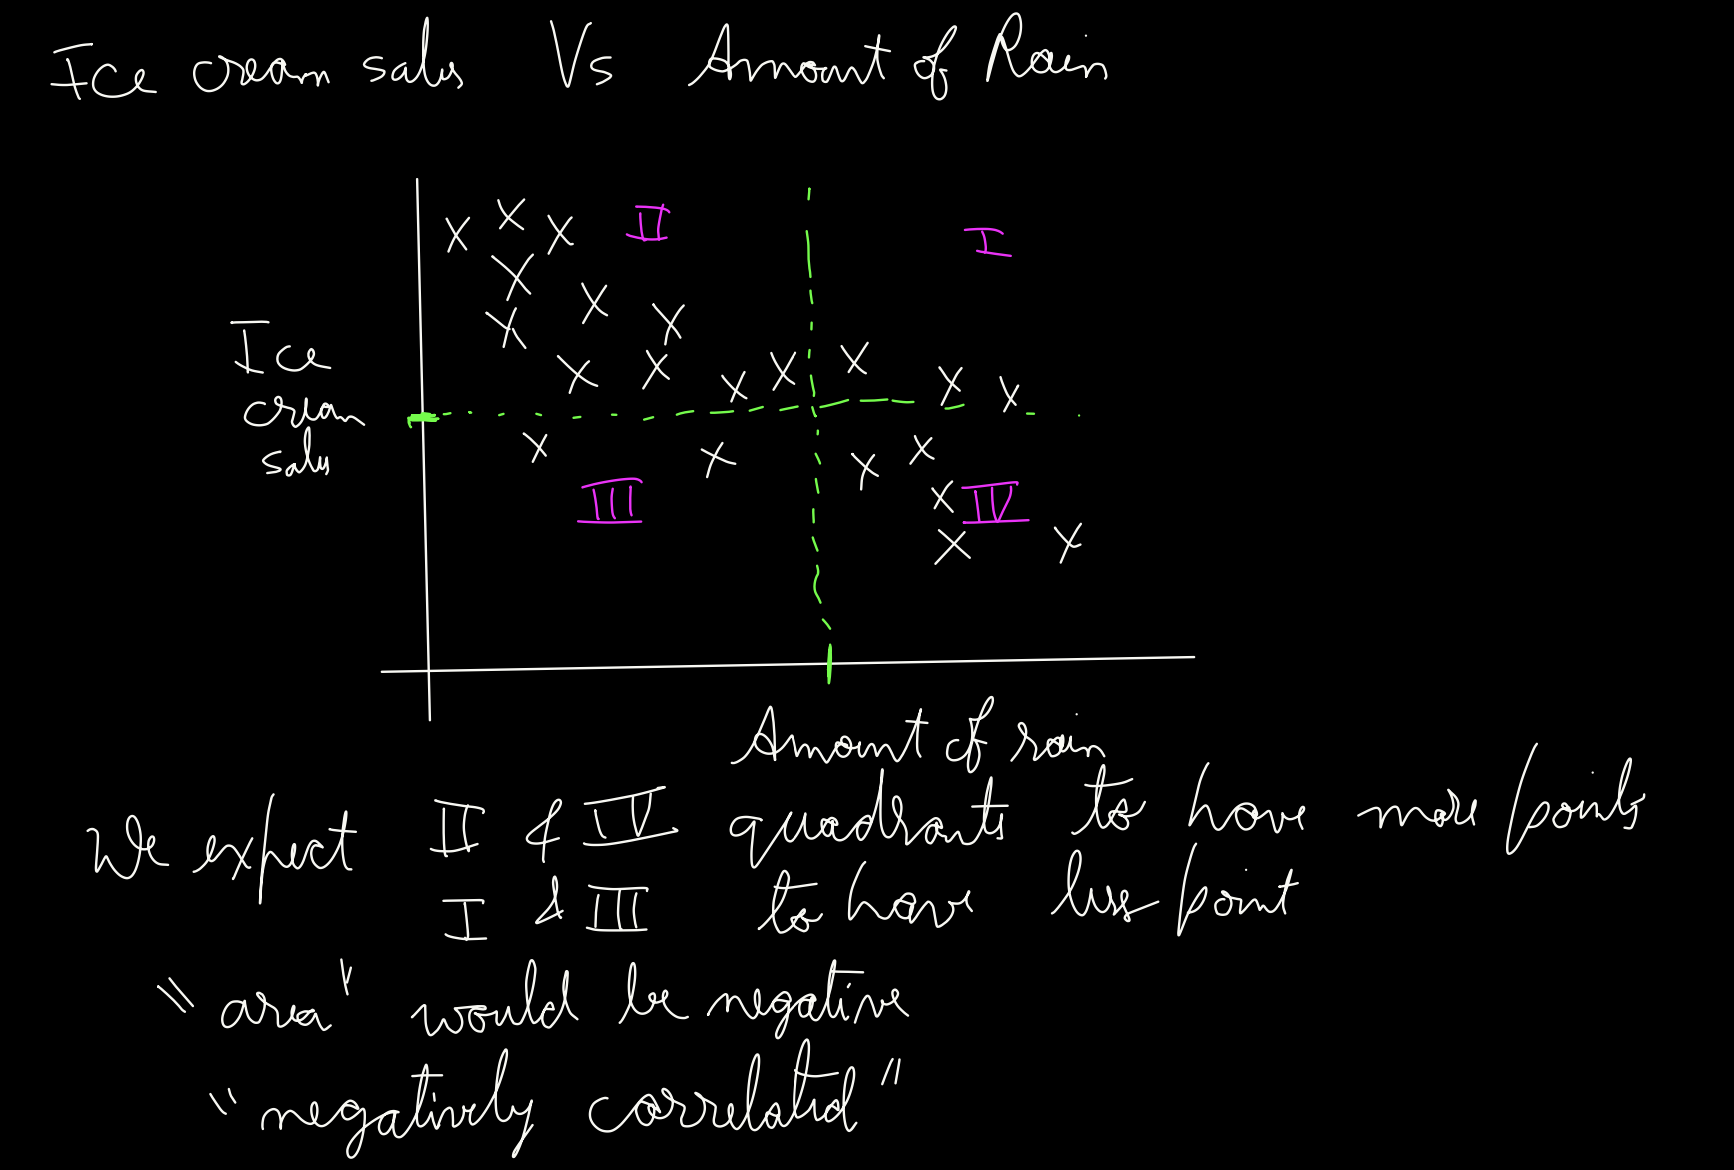

### <font color='purple'>**Example 3: Height vs Amount of Rain**</font>

Imagine we're working with a dataset that shows different people's heights and the amount of rainfall in a certain place.

- When we plot a scatter plot,each dot represents one person's height and the rainfall they experienced.

- In this scatter plot, we draw two <font color="green">green lines</font> to show the average height and average rainfall.

Now, if you look at the chart, you'll see it's split into four parts.

These splits happen where the average height and average rainfall lines cross.


<font color='purple'>Note:</font>
- Dots on the chart are spread out evenly around the middle.
- This suggests that there isn't a specific pattern, no clear trend in how height and rainfall relate.

- Surprisingly, each part of the chart has about the same number of dots. It's balanced.
  - This balance makes us think that the overall area of the chart won't lean more towards the top or bottom. The dots are spread out, making the whole thing neutral.

- Now, this idea of a neutral spread leads us to the term "**uncorrelated**" or **"no correlation"**.
  - In simple words, when things are uncorrelated, there's no obvious connection between them.
  - In the case of height and rainfall, it means changes in one don't seem to be linked to changes in the other.

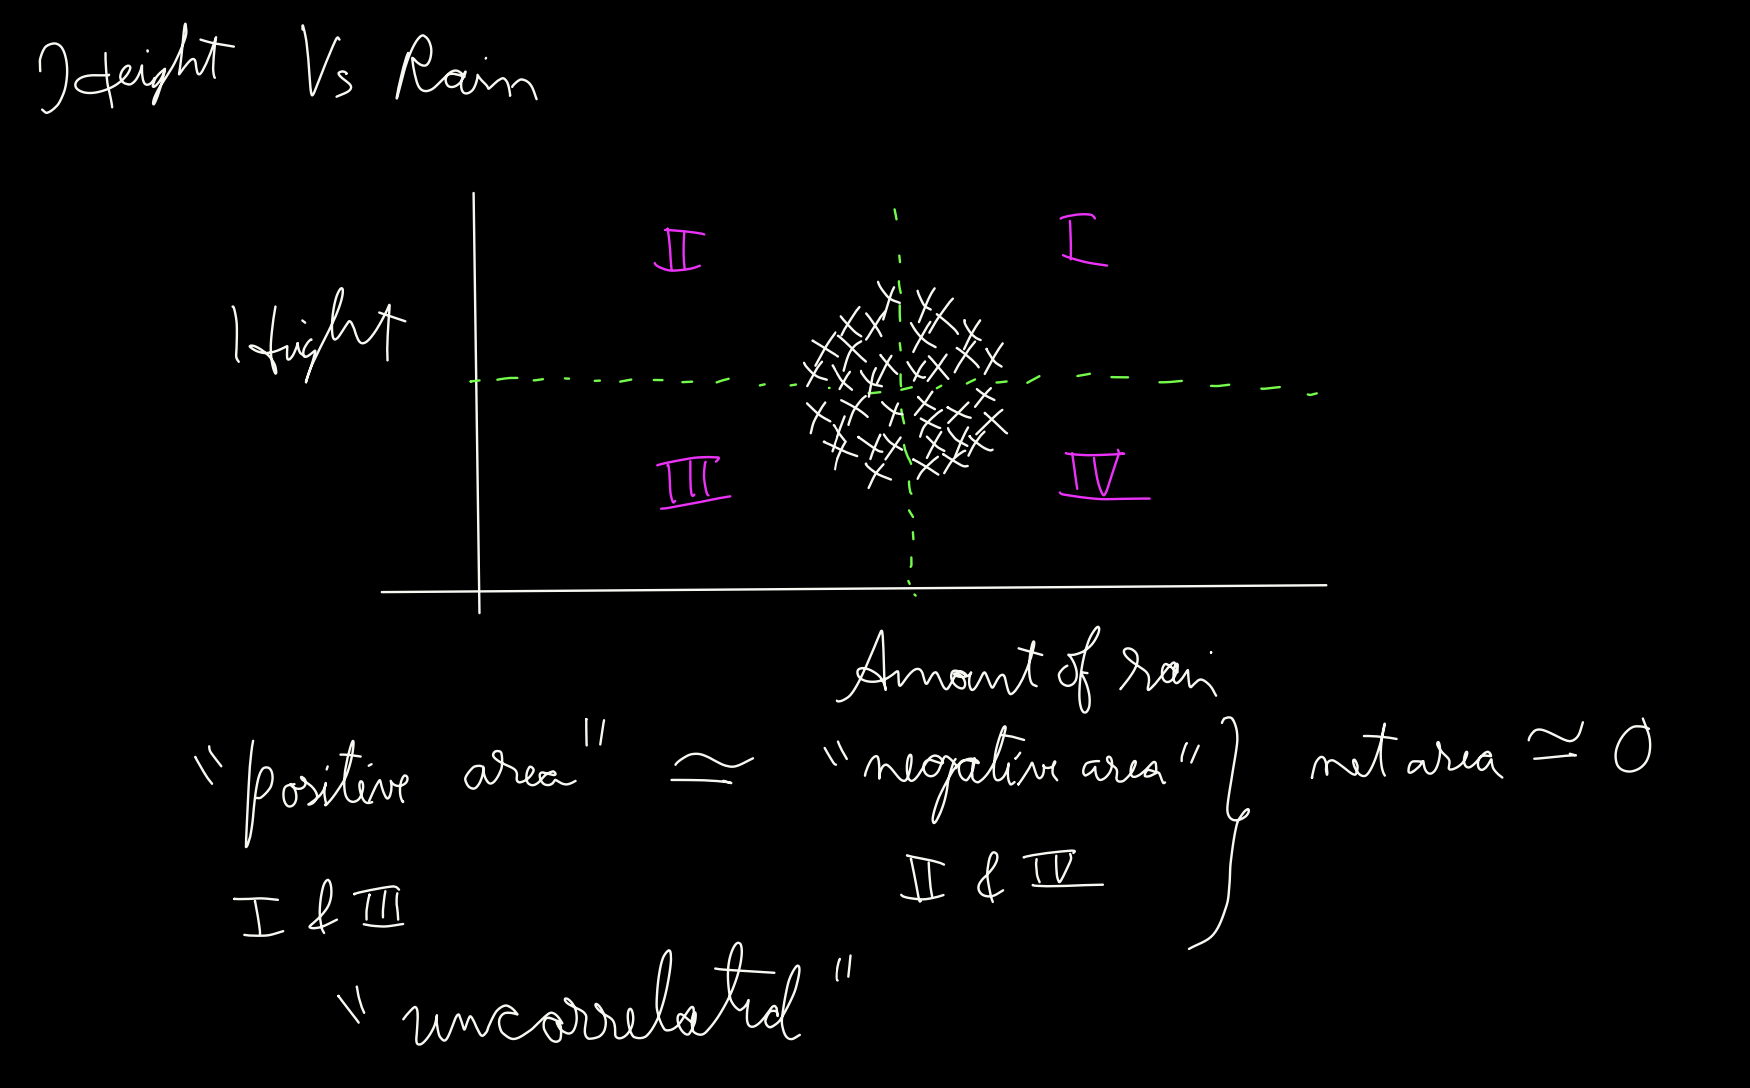

## <font color='blue'>**Pearson Correlation**</font>

Consider the same Height Vs Weight example, once again.

There are 2 scenarios:
- In **scenario 1**, we're dealing with **inches** and **kilograms**,
- Whereas, **scenario 2** involves **centimeters** and **pounds**.

We depict this relationship through a scatter plot, with each point representing a distinct pairing of height and weight values.

> <font color='purple'>Should the choice of scenario, whether it's scenario 1 or scenario 2, impact our ability to capture the relationship between height and weight?</font>

Ideally, **No**.
  - However, we encounter a challenge when using covariance, as it depends on the scale of measurement.
  - Suppose we plot a scatterplot for both these scenarios.
  - The scatterplot of scenario 2, would expands along both the x-axis and y-axis due to the different units of measurement.
  - The area occupied by the same point in scenario 2 becomes 2.54 times longer on the x-axis and 2.2 times longer on the y-axis compared to scenario 1.
  - This would impact covariance values.

To address this scale-related issue, we turn to **correlation**.

The formula for calculating Correlation: $Corr = \frac{Covariance(x, y)}{σ_x . σ_y}$

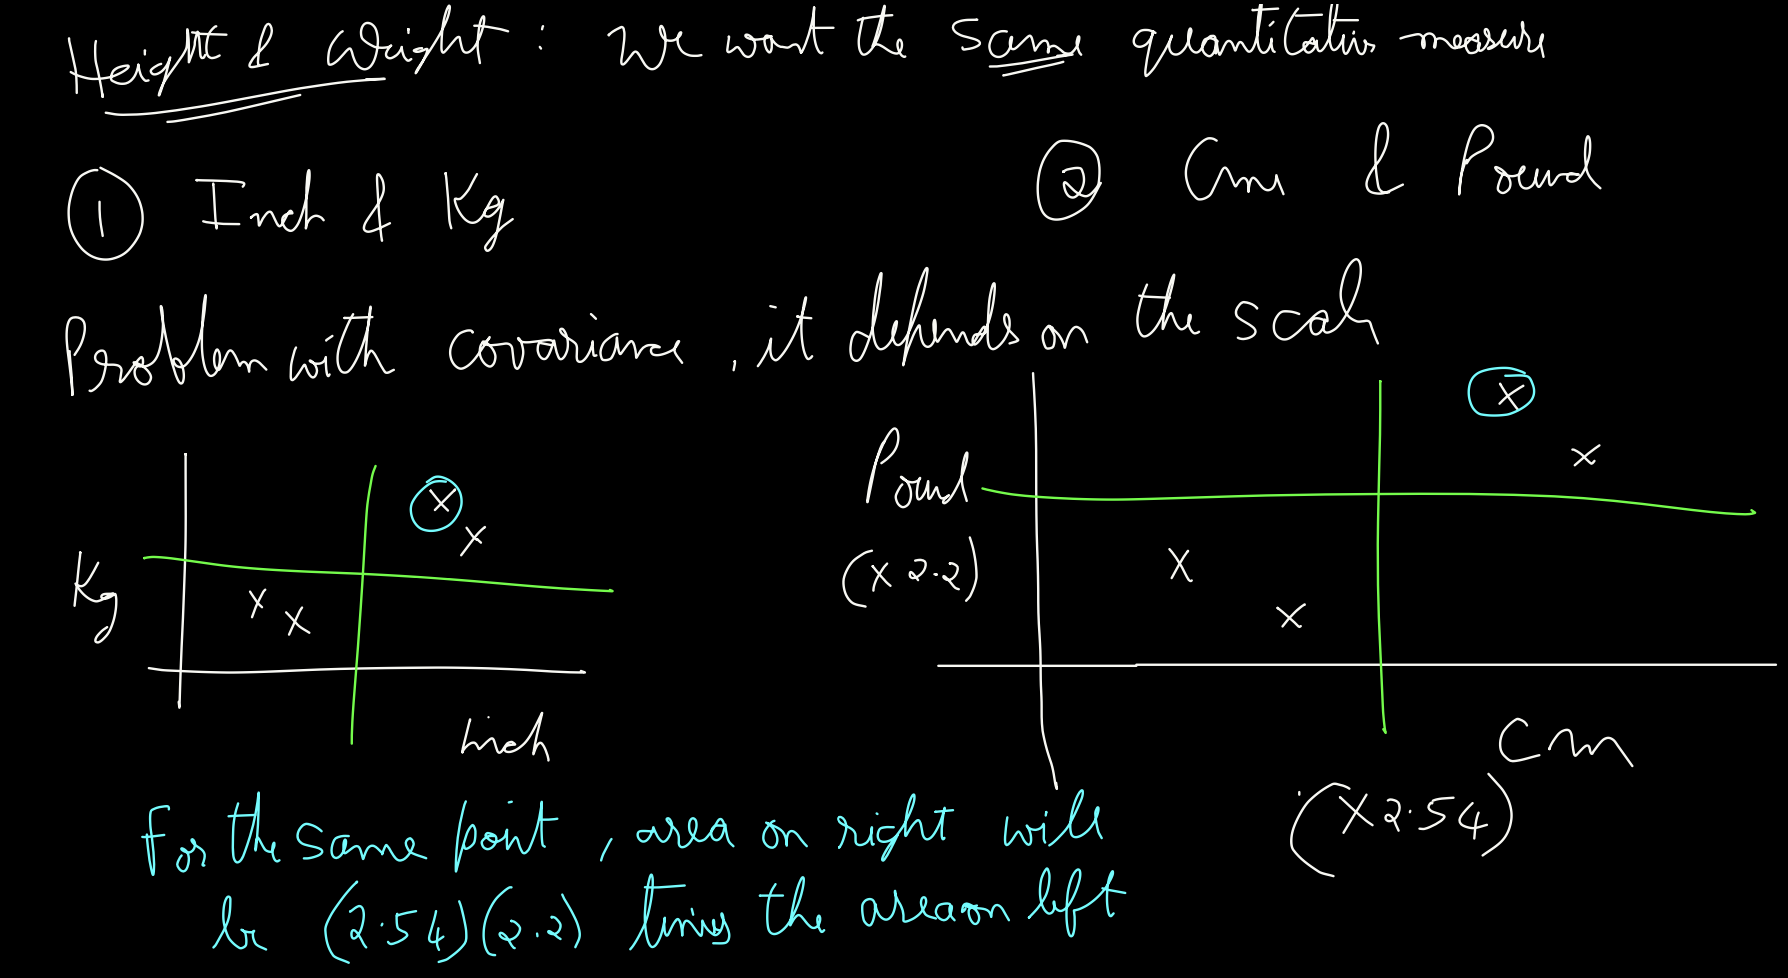

- Covariance captures the direction and strength of the relationship, but its units depend on the variables.
- Correlation removes the units and standardizes the relationship on a scale of -1 to 1, making it easier to compare relationships between different variables.



For Instance: Imagine two athletes with different weights.

- **Covariance**
  - A positive covariance would suggest that, on average, individuals with above-average heights tend to have above-average weights.
  - A negative covariance would suggest that, on average, individuals with above-average heights tend to have below-average weights.
  - However, the magnitude of covariance is not easily interpretable, and it depends on the scale of the variables.

- **Correlation**
  - A positive correlation (closer to 1) suggests a strong positive linear relationship, indicating that as height increases, weight tends to increase proportionally.
  - A negative correlation (closer to -1) suggests a strong negative linear relationship, indicating that as height increases, weight tends to decrease proportionally.
  - A correlation close to 0 suggests a weak or no linear relationship between height and weight.







When using Correlation, we can compare measurements in a way that makes sense, irrespective of the units we're using.

Further, the correlation value always falls between **-1 and 1**.

This value, often called **rho**, is the correlation coefficient.
  - It tells us how strong and in which direction two things are related.
  - If it's positive, there's a direct connection (directly proportional).
  - If it's negative, there's an opposite relationship (indirectly proportional).

In [ ]:
df_hw[["Height", "Weight"]].corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


The Pearson correlation coefficient is 0.924

###<font color='purple'>**Example 4: Salary vs Experience**</font>
Consider two features: `Salary` and `Experience`.
- One would expect a straightforward positive correlation.
- Yet, when we visualize this relationship on a scatter plot, we encounter an intriguing scenario.



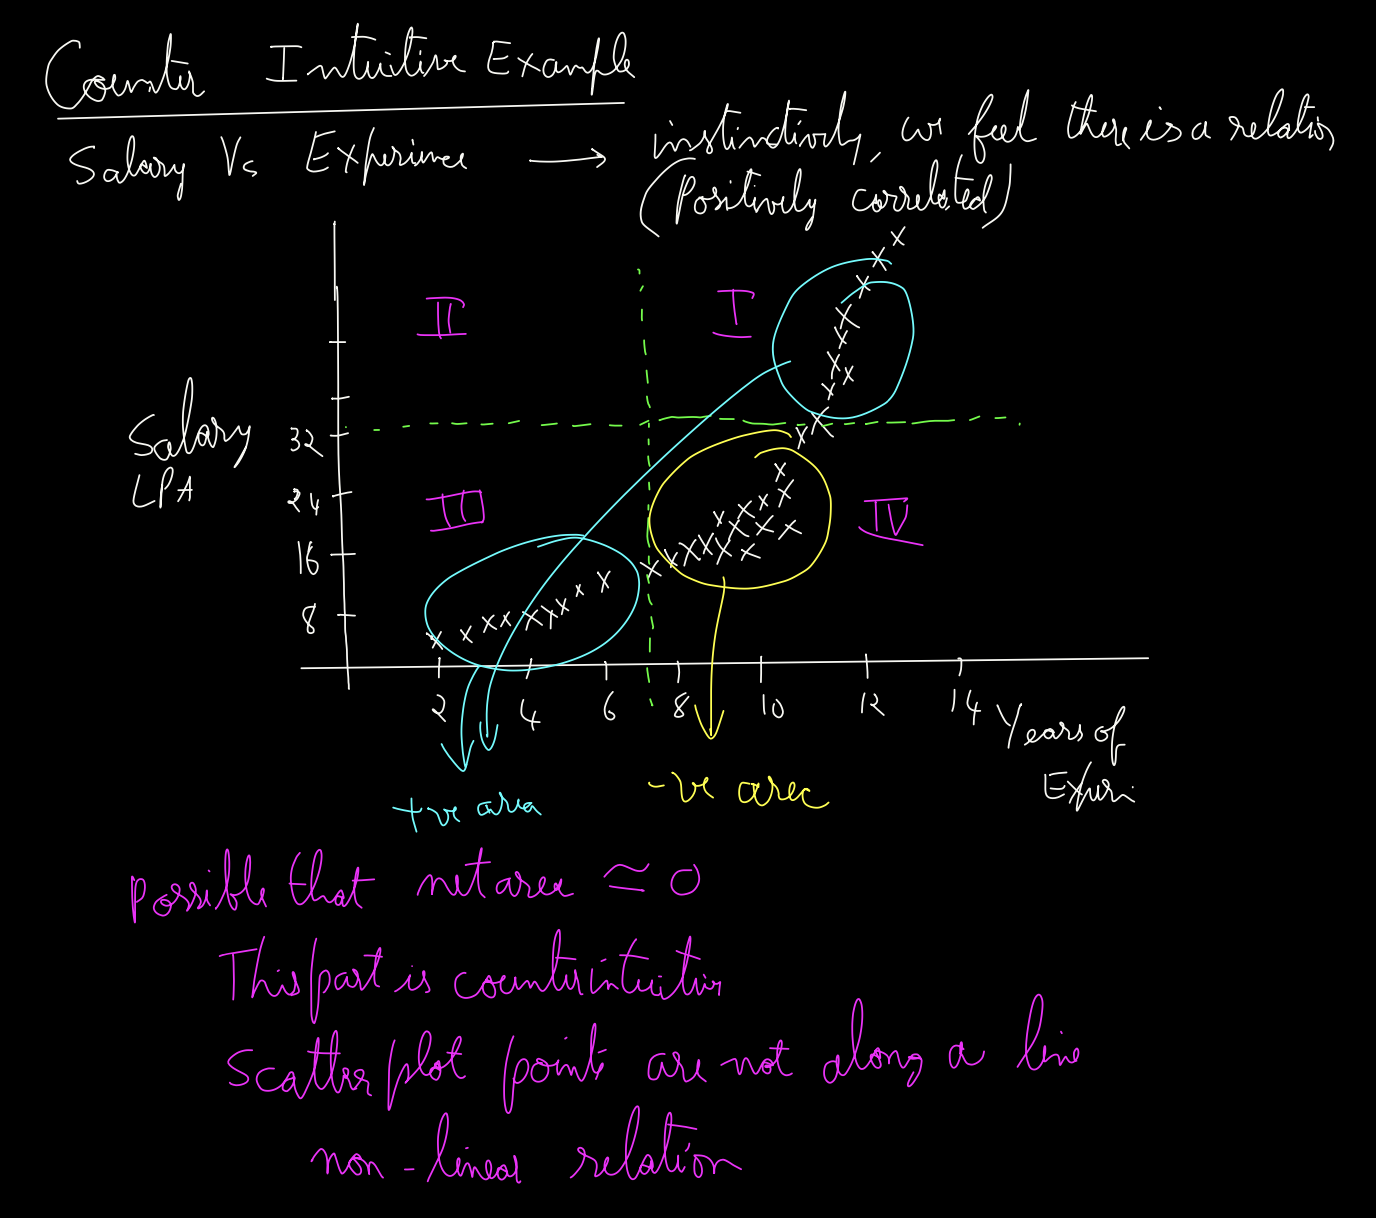

A common assumption is that salaries increase as experience grows, representing a positive correlation.
 - This expectation is reinforced by the green lines, which might even lead us to believe that the average salary is indicated.

However, the scatter plot holds a twist that challenges our intuition.

As we observe the arrangement of points, we notice that a significant portion of the net area might approach **zero**.

- This trend is **counterintuitive**

> <font color="purple">Why did we not obtain the expected result?</font>

This is because of the nature of the relationship between `salary` and `experience` — it's **not entirely linear.**

This is where the limitation of the Pearson Correlation coefficient becomes evident.
  - It excels at capturing linear relationships.
  - But, in scenarios like this, where the relationship isn't strictly linear, Pearson correlation might fall short.
  
To address this, we turn to the **Spearman Correlation**.
  - This is more suitable for providing a robust analysis in scenarios where the Pearson correlation falls short.

## <font color='blue'>**Spearman Correlation**</font>

In our previous example of **salary** and **experience**, we noticed that the increase in salary didn't match the growth in experience, hinting at a non-linear relationship.

- So, let's try a different approach. Instead of dealing with the actual numbers, what if we focus on their **ranks**?
  - This means looking at the positions of values along both axes, which helps us go beyond the limits of linear relationships.

> <font color='purple'>But what exactly is a rank? </font>

  - Think of it as a position based on the smallest value on an axis.
  - If the smallest values for experience and salary are both 2, they both get a rank of 1.
  - Other values get ranks based on their order along the axis.

<br>

By using ranks instead of actual values, we create a new way of showing the data.

- Now, with these rank-based representations, we can calculate the correlation.
- As we calculate the correlation using these ranks, something special happens.
  - The ranks for experience and salary get closely aligned.
  - In fact, according to the Pearson correlation, denoted as **rho**, the rank for experience and the rank for salary are likely to be close to 1.
  
<br>

**Note:**
- Ranked Data is also called as **Ordinal data**, whereas un-ranked data is called **Nominal data**
- This unique type of correlation, driven by ranks, is called the <font color='purple'>**Spearman Correlation**</font>.
  - It's perfect for situations where relationships are more complex than what linear patterns can capture.

The Spearman Correlation helps us uncover connections that might be hidden when using linear measures.

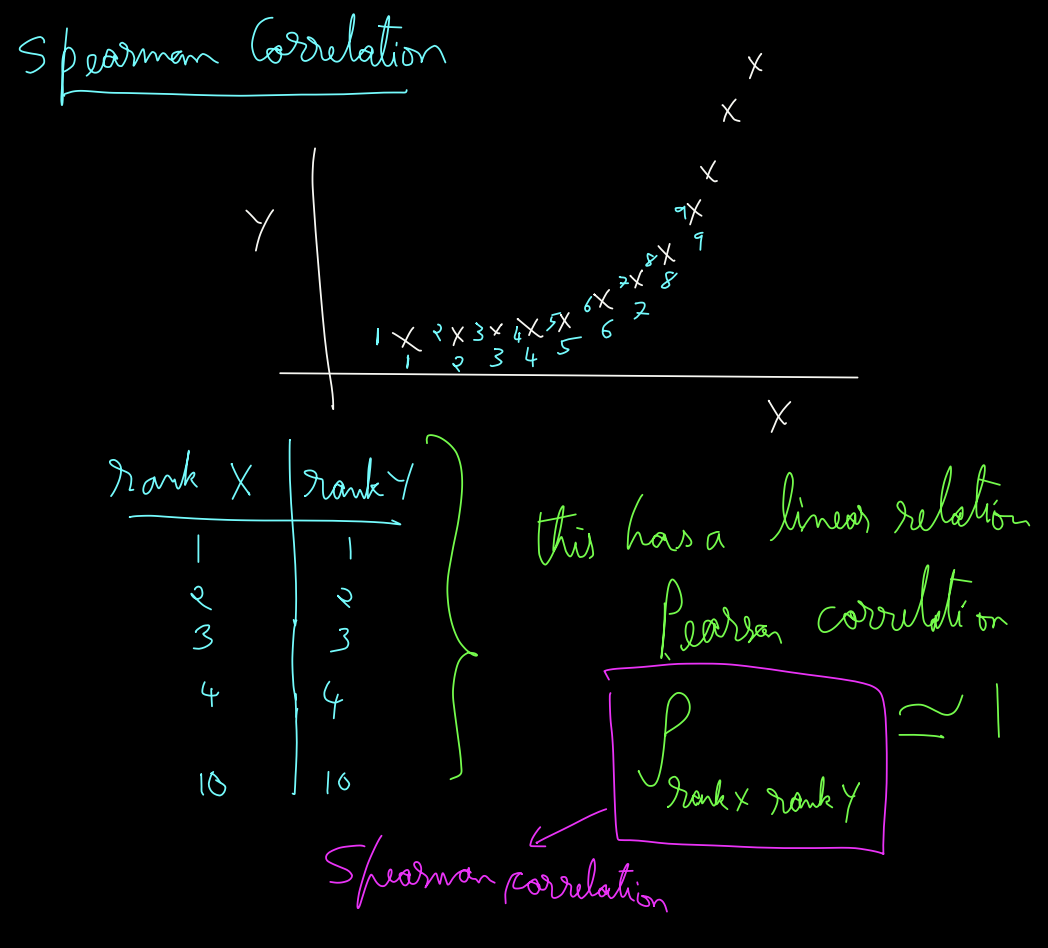

**Spearman Correlation** steps in to resolve the challenge posed by **non-linear relationships**.

Unlike Pearson correlation, Spearman correlation isn't confined to linear patterns.

It assesses relationships by considering the ranks of values, providing a more encompassing view of the data's behaviour.



Now, let us look at the same example as before Height vs Amount of Rain

- At a first glance, the data presents a rather scattered appearance, with points seemingly lacking any consistent pattern.
- This prompts an important question: what kind of correlation might we expect to see here?
  - Instinctively, we might lean toward a **Pearson correlation** that's close to 0, indicating a lack of linear relationship.

- But, here's where things get even more interesting. Instead of analyzing the raw data values, we opt for a rank-based approach.
  - By assigning ranks to the data points on both the x-axis (height) and the y-axis (rainfall), we open a new perspective on correlation—one that captures the intricacies beyond linear relationships.

- As we delve into this rank-based analysis, we uncover yet another layer of complexity. The ranks, much like the original data, exhibit a non-linear pattern.

This means that **Spearman correlation**, which thrives on these rank relationships, is also likely to be close to 0.

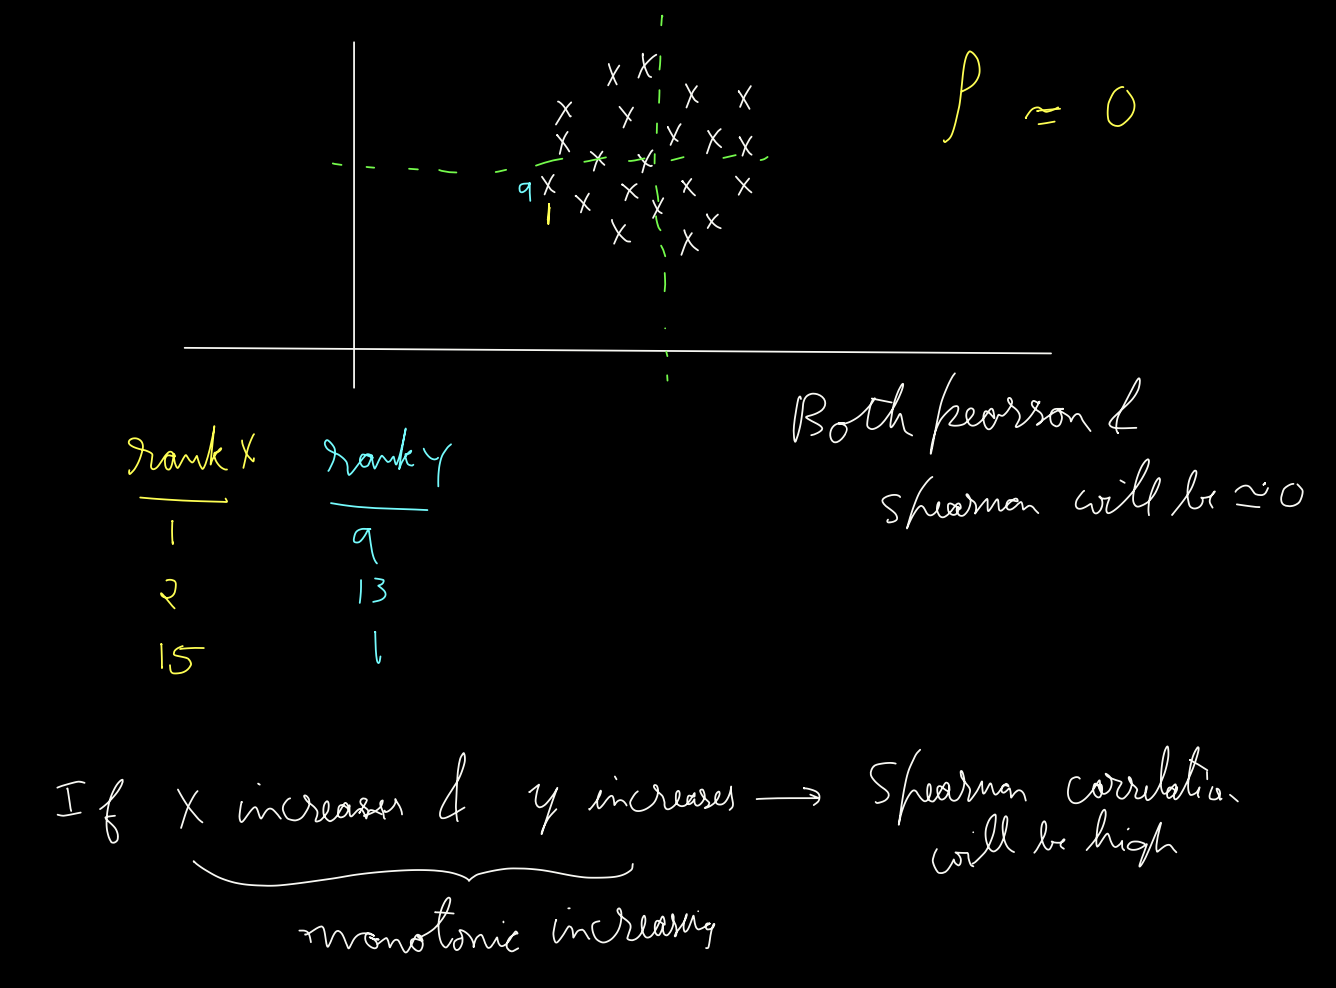

When talking about Spearman Correlation:
- We look at ranked data.
- Consider the situation when both `x` and `y` increase together or decrease together.

This phenomenon is referred to as a <font color='purple'>"**monotonic increase**" or "**monotonic decrease**," </font> respectively.

<br>

> <font color='purple'>What is a monotonic relationship?</font>

A monotonic relationship is a relationship where :
- As the value of one variable increases, so does the value of the other variable (aka Monotonic Increasing Relationship); or
- As the value of one variable increases, the other variable value decreases  (aka Monotonic Decreasing Relationship).

Basically, the relation between 2 variables is said to be monotonic if their rate of change is ALWAYS in the same direction.
- A monotonic increasing relation cannot have any point where the value of `y` is decreasing with an increase in `x`.

<br>


<font color='red'>Note:</font>

- The term <font color='purple'>**"non-monotonic"**</font> refers to a situation where there is no **consistent** trend or pattern in the increase or decrease of variables.
- i.e. suppose variable `y` is increasing with increase in `x` upto a point, beyond which it starts decreasing.

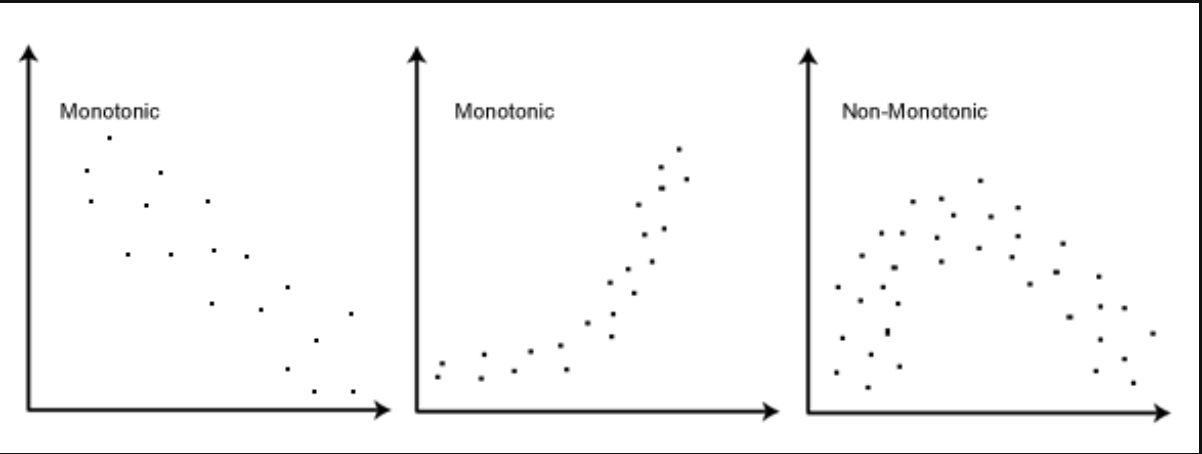



> <font color='purple'>Does this mean that a monotonic relation should have a straight line plot?</font>

No.
- It is only required that the rate of change of variables is in the same direction.
- However, the increasing / decreasing relation between the variables **may or may not be linear**.
- It's like walking up or down a hill—your elevation is always going in the same direction, even if you're not climbing at a constant speed.

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/060/253/original/Screenshot_2023-12-27_at_7.09.28_PM.png?1703684388">

In [ ]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
# H0: No correlation
# Ha: There is correlation
pearsonr(df_hw["Height"], df_hw["Weight"])

PearsonRResult(statistic=0.9247562987409148, pvalue=0.0)

In [ ]:
# H0: No correlation
# Ha: There is correlation
spearmanr(df_hw["Height"], df_hw["Weight"])

SignificanceResult(statistic=0.9257076644210767, pvalue=0.0)

## <font color='blue'>Visualizing Correlation using HeatMap</font>

### <font color='purple'> Cement Data Case study</font>

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1s2Qad59GSQPT733fbS5fnULPhilRGj25 -O concrete_data.csv

--2024-01-18 09:50:13--  https://drive.google.com/uc?id=1s2Qad59GSQPT733fbS5fnULPhilRGj25
Resolving drive.google.com (drive.google.com)... 172.253.123.100, 172.253.123.102, 172.253.123.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.123.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1s2Qad59GSQPT733fbS5fnULPhilRGj25 [following]
--2024-01-18 09:50:13--  https://drive.usercontent.google.com/download?id=1s2Qad59GSQPT733fbS5fnULPhilRGj25
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.212.132, 2607:f8b0:400c:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.212.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59010 (58K) [application/octet-stream]
Saving to: ‘concrete_data.csv’

concrete_data.csv   100%[===================>]  57.63K  --.-KB/s    in 0.001s  

2024-01-18 09:50:14 (51.8

In [ ]:
import pandas as pd
df = pd.read_csv('/content/concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


The concrete compressive strength & the ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.

- Cement -- kg in a m^3 mixture
- Blast Furnace Slag-- quantitative -- kg in a m^3 mixture
- Fly Ash -- quantitative -- kg in a m^3 mixture
- Water -- quantitative -- kg in a m^3 mixture
- Superplasticizer -- quantitative -- kg in a m^3 mixture
- Coarse Aggregate -- quantitative -- kg in a m^3 mixture
- Fine Aggregate -- quantitative -- kg in a m^3 mixture
- Age -- quantitative -- Day (1~365)
- Concrete compressive strength -- quantitative -- MPa(megapascal)

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from the laboratory

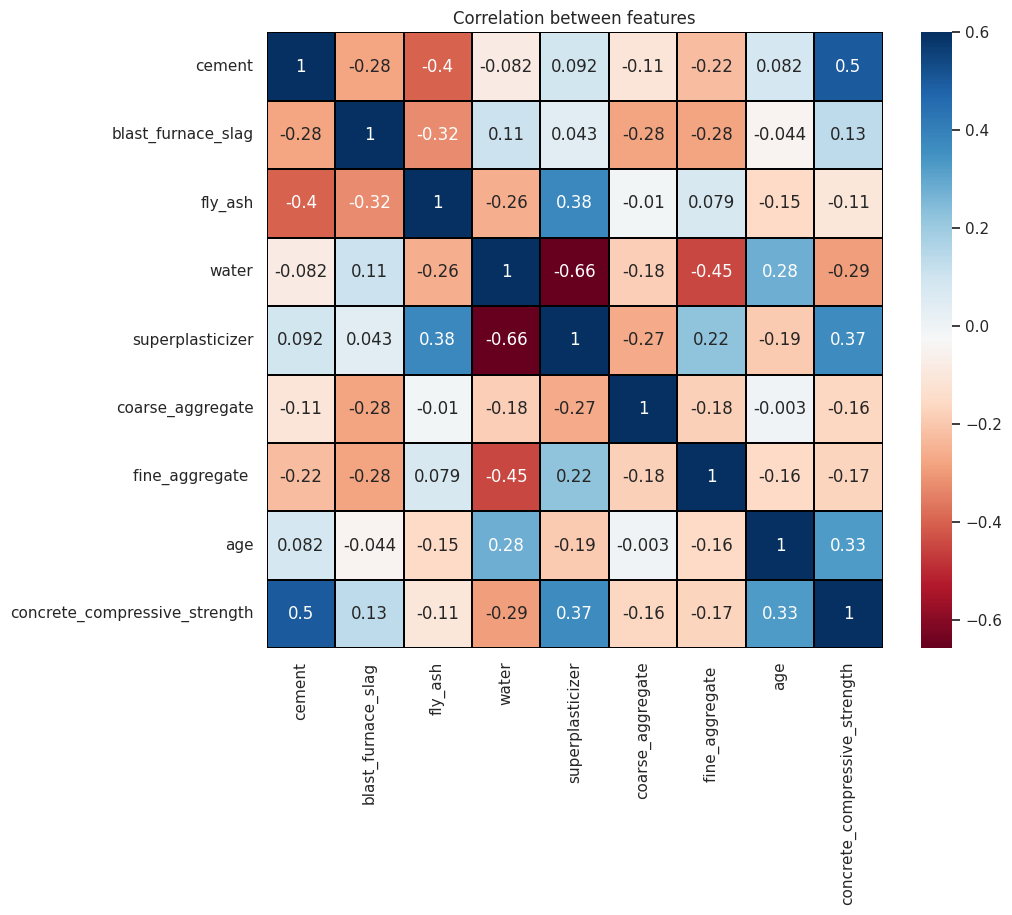

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.0)
plt.figure(figsize=(10,8))
correlation_values = df.corr(method = 'pearson')
sns.heatmap(correlation_values, vmax = .6, linewidths=0.01, square=True, annot=True, cmap="RdBu", linecolor="black")
plt.title('Correlation between features');

- HeatMap is basically a matrix of correlations

- A heat map plots rectangular data as a colour-encoded matrix.
- The stronger the colour, the stronger the correlation between the variables

Numbers in cells indicate the value of the correlation coefficient between the two variables
- Diagonal values are all **1** because they represent correlation between the same variable
- For all other pairs of variables, we can check the correlation coefficient by both value and colour intensity

Here are some observations based on the above HeatMap:

**Positive Correlations:**

1. **Cement and concrete_compressive_strength:** As the amount of cement used increases, the concrete's compressive strength also tends to increase. This strong positive correlation (0.5) indicates that cement is a crucial ingredient for achieving desired strength.
2. **Superplasticizer and fly ash:** The use of superplasticizer and the presence of fly ash in the concrete mix tend to increase together (correlation of 0.38). This suggests a potential connection between their functionalities.

**Negative Correlations:**

1. **Water and superplasticizer:** As the water content in the mix increases, the use of superplasticizer tends to decrease significantly (correlation of -0.657). This implies that more water weakens the concrete, requiring more superplasticizer to maintain workability.
2. **Water and concrete_compressive_strength:** Increased water content is associated with lower concrete compressive strength (correlation of -0.289). This negative correlation emphasizes the importance of controlling water content for optimal strength.

**No Correlation (or Very Low):**

1. **Age and coarse_aggregate:** The age of the concrete and the amount of coarse aggregate have almost no correlation (coefficient of -0.003). This suggests that the time elapsed since mixing has minimal impact on the amount of coarse aggregate used.
2. **blast_furnace_slag and superplasticizer:** The correlation between blast_furnace_slag and superplasticizer is 0.043. This value is very close to zero, indicating a weak or almost negligible relationship between the two variables.

---

**Correlation Test:**
- Type: Parametric (Pearson), non-parametric (Spearman)
- Reason: Pearson assumes bivariate normal distribution, while Spearman does not make any distributional assumptions.

**Pearson Correlation:**
- Type: Parametric
- Reason: Assumes bivariate normal distribution.

**Spearman Correlation:**
- Type: Non-parametric
- Reason: Does not make distributional assumptions and is based on the ranking of values.

> **Q. What is meant by a Bivariate Normal Distribution?**

Suppose there are two random variables X and Y that both follow the **Normal distribution**.

Suppose you take any real numbers `a` and `b`, and create a new random variable `Z` as a linear combination of `X` and `Y`, i.e., $Z=aX+bY$

If the resulting random variable `Z` (given by the **linear combination**), is also normally distributed, we say that `X` and `Y` follow  **Bivariate Normal Distribution**.

- It implies that not only are X and Y individually normally distributed, but any linear combination of X and Y (where the coefficients are real numbers) will also result in a random variable that follows a normal distribution.

- This property makes bivariate normal distributions mathematically convenient and allows for various statistical analyses and predictions.




<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/060/254/original/Screenshot_2023-12-27_at_7.11.52_PM.png?1703684528">

---
---